In [1]:
import numpy as np
import pandas as pd
import cv2
import os 
import fnmatch

In [2]:
Lab_tested_data = pd.read_csv('C:\\Users\\Mahmood Yousaf\\Desktop\\FYP\\Final-Year-Project-Soil-Analysis-using-machine-learning\\Lab Results\\Soil_Lab_Results - Sheet1.csv')

In [3]:
Sample_ID = Lab_tested_data.iloc[:,0]
PH_Value = Lab_tested_data.iloc[:,2]

In [10]:
def load_images_from_folder(folder):
    Labels = []
    counter = 0
    for filename in os.listdir(folder):
        x = filename.split("_")
        id = float(x[0])
        img = cv2.imread(os.path.join(folder,filename))
        Result = Sample_ID.isin([id])
        Result = Sample_ID[Result];
        if len(Result) >= 1:
            print(counter)
            counter += 1;
            cv2.imwrite("C:\\Users\\Mahmood Yousaf\\Desktop\\FYP\\Dataset RGB\\Training_data\\{}".format(filename),img)
        else:
            continue
    return Labels

In [11]:
dataset = load_images_from_folder('C:\\Users\\Mahmood Yousaf\\Desktop\\FYP\\Dataset RGB\\Mixed_data')

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [6]:
len(dataset)

701

In [7]:
Ph_index = []
for data in dataset:
    image = data[1]
    # extracting blue,red,green channel from color image
    blue_channel = image[:,:,0]
    green_channel = image[:,:,1]
    red_channel = image[:,:,2]
    temp = (np.median(red_channel)/np.median(green_channel))/np.median(blue_channel)
    temp = np.nanmean(temp)
    print(temp)
    Ph_index.append([temp,data[2]])

0.007230565182047662
0.006654965628199503
0.006142346441338967
0.006239913932221624
0.006622023809523809
0.006280268708014373
0.019096209912536445
0.013522727272727271
0.006977565801095213
0.005974559938327123
0.006525670257095683
0.007928364891334763
0.006275775506544737
0.006374085684430512
0.006469979296066253
0.0063758977053774745
0.006696970748464555
0.006046188918624244
0.006483482556344551
0.007119682768565249
0.006094952951240376
0.005523877405559516
0.006060606060606061
0.005949952400380797
0.006157974404843815
0.005810220852593734
0.00561643417478099
0.005773170277484636
0.006749829118250171
0.006527673378961111
0.00684931506849315
0.006779523403564325
0.006734006734006734
0.005618334179786693
0.005780539962576851
0.006320877486521658
0.006445564279854682
0.005522745411013568
0.005916305916305916
0.0058823529411764705
0.006451009723261032
0.00588512241054614
0.005936592143488696
0.0059355568117580556
0.006340865300402873
0.0061723776746969924
0.006478745169356671
0.0060547681

0.007835802032253172
0.007791217173368203
0.009785932721712538
0.00683982683982684
0.00723387946727987
0.006363601722364059
0.00817686250757117
0.006860098965362123
0.006577615867233354
0.007193158953722334
0.00810401119402985
0.005823061688983477
0.006608569353667393
0.006724870221802737
0.006368765359454501
0.008097808828199427
0.006151902101622773
0.006307258632840028
0.006596004270245539
0.006639644856205366
0.007478427612655801
0.005419839255499153
0.005375139977603583
0.00741704619388419
0.005342451116572284
0.006804572672836145
0.006584821428571429
0.007323724191663421
0.0057116104868913855
0.006425528842682839
0.006772368735558919
0.008901548869503293
0.008407031335298614
0.007430488974113135
0.00783649264005083
0.01060406611086734
0.012835249042145594
0.00624103299856528
0.008676131537434777
0.005947607591553061
0.006440857770705464
0.005945499587118083
0.0061234263820470715
0.006368919672000637
0.007463032494321606
0.006080634500991409
0.006201275690999291
0.00632255042986652

In [8]:
data1 = pd.DataFrame(Ph_index,columns=['PH_Index','PH_Value'])

In [9]:
data1.to_csv("Ph_Index_with_Ph_value.csv")

print(data1)

     PH_Index  PH_Value
0    0.007231      7.95
1    0.006655      7.95
2    0.006142      7.90
3    0.006240      7.90
4    0.006622      7.75
..        ...       ...
696  0.007710      7.85
697  0.004352      7.80
698  0.007780      7.80
699  0.015429      7.75
700  0.012199      7.75

[701 rows x 2 columns]


In [10]:
import matplotlib.pyplot as plt

In [11]:
data2 = pd.read_csv("Ph_Index_with_Ph_value.csv")

In [12]:
Ph_index = data2.iloc[:,1]

In [13]:
Ph_value = data2.iloc[:,2]

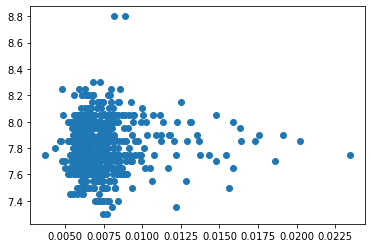

In [14]:
plt.scatter(Ph_index,Ph_value)

In [15]:
# importing the libraries
from keras.models import Sequential
from keras.layers import Dense

# create ANN model
model = Sequential()

# Defining the Input layer and FIRST hidden layer, both are same!
model.add(Dense(units=5, input_dim=1, kernel_initializer='normal', activation='relu'))

# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
model.add(Dense(units=5, kernel_initializer='normal', activation='tanh'))

# The output neuron is a single fully connected node 
# Since we will be predicting a single number
model.add(Dense(1, kernel_initializer='normal'))

# Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Fitting the ANN to the Training set
model.fit(Ph_index, Ph_value ,batch_size = 20, epochs = 500, verbose=1)


Epoch 1/500
36/36 [==============================] - 0s 878us/step - loss: 60.6032
Epoch 2/500
36/36 [==============================] - 0s 443us/step - loss: 59.5592
Epoch 3/500
36/36 [==============================] - 0s 456us/step - loss: 57.9625
Epoch 4/500
36/36 [==============================] - 0s 404us/step - loss: 55.6533
Epoch 5/500
36/36 [==============================] - 0s 388us/step - loss: 52.5789
Epoch 6/500
36/36 [==============================] - 0s 416us/step - loss: 48.8054
Epoch 7/500
36/36 [==============================] - 0s 360us/step - loss: 44.5155
Epoch 8/500
36/36 [==============================] - 0s 388us/step - loss: 39.9577
Epoch 9/500
36/36 [==============================] - 0s 376us/step - loss: 35.3934
Epoch 10/500
36/36 [==============================] - 0s 360us/step - loss: 31.0420
Epoch 11/500
36/36 [==============================] - 0s 399us/step - loss: 27.0417
Epoch 12/500
36/36 [==============================] - 0s 389us/step - loss: 23.4618
E

36/36 [==============================] - 0s 360us/step - loss: 0.0352
Epoch 197/500
36/36 [==============================] - 0s 439us/step - loss: 0.0352
Epoch 198/500
36/36 [==============================] - 0s 428us/step - loss: 0.0352
Epoch 199/500
36/36 [==============================] - 0s 378us/step - loss: 0.0351
Epoch 200/500
36/36 [==============================] - 0s 412us/step - loss: 0.0351
Epoch 201/500
36/36 [==============================] - 0s 388us/step - loss: 0.0351
Epoch 202/500
36/36 [==============================] - 0s 416us/step - loss: 0.0352
Epoch 203/500
36/36 [==============================] - 0s 388us/step - loss: 0.0353
Epoch 204/500
36/36 [==============================] - 0s 360us/step - loss: 0.0353
Epoch 205/500
36/36 [==============================] - 0s 363us/step - loss: 0.0352
Epoch 206/500
36/36 [==============================] - 0s 389us/step - loss: 0.0352
Epoch 207/500
36/36 [==============================] - 0s 388us/step - loss: 0.0352
Epoch 

36/36 [==============================] - 0s 414us/step - loss: 0.0353
Epoch 391/500
36/36 [==============================] - 0s 363us/step - loss: 0.0352
Epoch 392/500
36/36 [==============================] - 0s 415us/step - loss: 0.0353
Epoch 393/500
36/36 [==============================] - 0s 415us/step - loss: 0.0352
Epoch 394/500
36/36 [==============================] - ETA: 0s - loss: 0.035 - 0s 456us/step - loss: 0.0355
Epoch 395/500
36/36 [==============================] - 0s 358us/step - loss: 0.0355
Epoch 396/500
36/36 [==============================] - 0s 423us/step - loss: 0.0356
Epoch 397/500
36/36 [==============================] - 0s 423us/step - loss: 0.0352
Epoch 398/500
36/36 [==============================] - 0s 390us/step - loss: 0.0353
Epoch 399/500
36/36 [==============================] - 0s 386us/step - loss: 0.0352
Epoch 400/500
36/36 [==============================] - 0s 386us/step - loss: 0.0367
Epoch 401/500
36/36 [==============================] - 0s 380us/st

36/36 [==============================] - 0s 387us/step - loss: 0.0353
Epoch 488/500
36/36 [==============================] - 0s 403us/step - loss: 0.0352
Epoch 489/500
36/36 [==============================] - 0s 387us/step - loss: 0.0352
Epoch 490/500
36/36 [==============================] - 0s 388us/step - loss: 0.0354
Epoch 491/500
36/36 [==============================] - 0s 387us/step - loss: 0.0352
Epoch 492/500
36/36 [==============================] - 0s 415us/step - loss: 0.0356
Epoch 493/500
36/36 [==============================] - 0s 415us/step - loss: 0.0355
Epoch 494/500
36/36 [==============================] - 0s 359us/step - loss: 0.0354
Epoch 495/500
36/36 [==============================] - 0s 386us/step - loss: 0.0353
Epoch 496/500
36/36 [==============================] - 0s 388us/step - loss: 0.0354
Epoch 497/500
36/36 [==============================] - 0s 388us/step - loss: 0.0352
Epoch 498/500
36/36 [==============================] - 0s 443us/step - loss: 0.0353
Epoch 

In [16]:
model.predict(Ph_index)

array([[7.819431 ],
       [7.819066 ],
       [7.8187404],
       [7.818803 ],
       [7.819045 ],
       [7.818828 ],
       [7.826786 ],
       [7.823369 ],
       [7.81927  ],
       [7.818634 ],
       [7.818984 ],
       [7.819871 ],
       [7.8188257],
       [7.8188877],
       [7.8189483],
       [7.8188887],
       [7.819092 ],
       [7.81868  ],
       [7.818957 ],
       [7.8193607],
       [7.818711 ],
       [7.818348 ],
       [7.8186884],
       [7.818619 ],
       [7.818751 ],
       [7.8185296],
       [7.818406 ],
       [7.8185062],
       [7.819126 ],
       [7.818985 ],
       [7.819189 ],
       [7.8191447],
       [7.8191166],
       [7.8184075],
       [7.818511 ],
       [7.8188543],
       [7.8189335],
       [7.8183465],
       [7.8185973],
       [7.8185754],
       [7.818937 ],
       [7.818578 ],
       [7.81861  ],
       [7.818609 ],
       [7.8188667],
       [7.81876  ],
       [7.818954 ],
       [7.8186855],
       [7.819063 ],
       [7.8186893],


<bound method Callback.on_batch_begin of <tensorflow.python.keras.callbacks.History object at 0x000001C38F81EBE0>>

0.0072305651820476